In [83]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import random as random

In [29]:
iris = datasets.load_iris()
features = iris.data 
target = iris.target

species_names = list()

for i in target:
    if i == 0:
        species_names.append('setosa')
    elif i == 1:
        species_names.append('versicolor')
    else:
        species_names.append('virginica')

<AxesSubplot:>

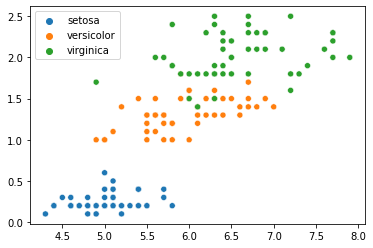

In [31]:
sns.scatterplot(x = features[:, 0], y = features[:, 3], hue = species_names)

In [118]:
def predict(intercept, coefficient, x):
    return intercept + coefficient * x

def predict_list(intercept, coefficient, dataset):
    return np.array([intercept + coefficient * x for x in dataset])

# 1. Gradient Descent

In [131]:
gd_loss = pd.DataFrame(columns=['epoch', 'b0', 'b1', 'cost'])

def gd(x, y, epochs = 10, alpha = 0.01):
    length = len(x)
    intercept, coefficient, prediction= 0.0, 0.0, 0.0
    for epoch in range(0, epochs):
        prediction = predict_list(intercept, coefficient, x)
        b0_error = (1/length) * np.sum(prediction - y)
        b1_error = (1/length) * np.sum((prediction - y) * x)
        intercept = intercept - alpha * b0_error
        coefficient = coefficient - alpha * b1_error 
        gd_loss.loc[i] = [epoch, intercept, coefficient, 0]
    return intercept, coefficient

intercept, coefficient = gd(np.array(features[:, 0]), np.array(features[:, 3]), epochs = 10)

In [133]:
print(intercept, coefficient)

0.02864587245970464 0.2082943655557912


In [132]:
gd_loss.tail(20)

,epoch,b0,b1,cost
5.9,9.0,0.028646,0.208294,0.0


# 2. Mini Batch Gradient Descent

In [ ]:
mbgd_loss = pd.DataFrame(columns=['b0', 'b1', 'loss'])

def mbgd(x, y, alpha = 0.01):
    pass

# 3. Stochastic Gradient Descent

In [96]:
sgd_loss = pd.DataFrame(columns=['b0', 'b1', 'loss'])

def sgd(x,y, alpha = 0.01):
    intercepts, coefficients = list(), list()
    intercept, coefficient= 0.0, 0.0
    prediction = 0.0
    for i in range(0, 201):
        rand_index = random.randint(0, len(x)-1)
        prediction = predict(intercept, coefficient, x[rand_index])
        error = prediction - y[rand_index]
        intercept = intercept - alpha * error
        coefficient = coefficient - alpha * error * x[rand_index]
        sgd_loss.loc[i] = [intercept, coefficient, 0]
        intercepts.append(intercept)
        coefficients.append(coefficient)
    return intercepts, coefficients

In [97]:
intercepts, coefficients = sgd(x = features[:, 0], y = features[:, 3])

In [75]:
predictions = list()
for i in features[:,0]:
    predictions.append(predict(intercepts[-1], coefficients[-1], i))


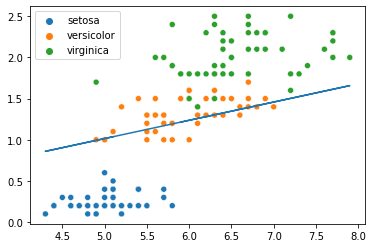

In [99]:
import matplotlib.pyplot as plt
sns.scatterplot(x = features[:, 0], y = features[:, 3], hue = species_names)
plt.plot(features[:, 0], -0.093069 + (0.221623 * features[:, 0]))

In [71]:
print(predictions[-10:])

[2.189915659968495, 2.2536695785309386, 1.9030230264374994, 2.2217926192497166, 2.189915659968495, 2.189915659968495, 2.062407822843608, 2.1261617414060514, 2.030530863562386, 1.9348999857187212]


In [72]:
print(features[-10:, 3])

[2.4 2.3 1.9 2.3 2.5 2.3 1.9 2.  2.3 1.8]
